# Introduction Notebook for DBCV

In [ ]:
import DBCV 
from DBCV import DBCV_score
import sklearn
from sklearn import datasets
from ClustSim import simulate_clusters, plot_clusters

## Scenario I

<function matplotlib.pyplot.show(close=None, block=None)>

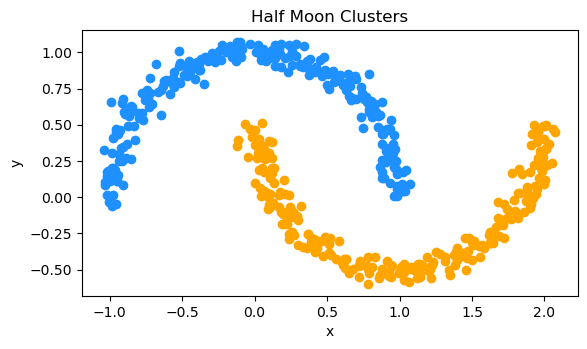

In [3]:
noisy_moons = datasets.make_moons(noise = 0.05, n_samples = 500, random_state=30)
X = noisy_moons[0]
labels = noisy_moons[1]
clust1 = X[np.where(labels == 1)]
clust2 = X[np.where(labels == 0)]

plt.scatter(*clust1.T, color = 'orange')
plt.scatter(*clust2.T, color = 'dodgerblue')
plt.title('Half Moon Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal')
plt.show

In [4]:
DBCV(X,labels)

0.5068928345037831

## Scenario II

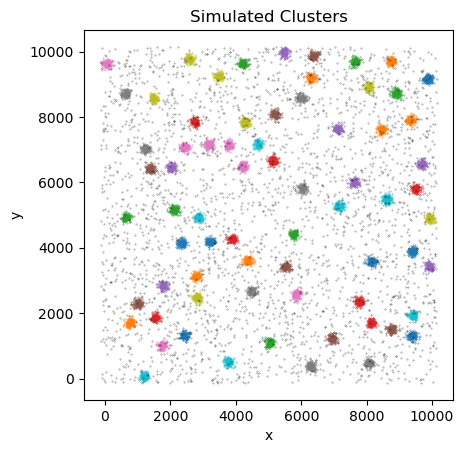

In [8]:
X, labels = simulate_clusters(num_clusters = 70, clustered_pts = 150,
                              cluster_size = 300, noise_pts = 3000, 
                              min_sep = 600, space = [0,10000])

plot_clusters(X,labels)

In [9]:
score, ind_clust_scores = DBCV(X,labels, ind_clust_scores = True)
print(score)

In [11]:
x = X[:,0][np.where(labels != -1)]
y = X[:,1][np.where(labels != -1)]
zlist = []
for i in range(len(labels)):
    if labels[i] == -1:
        continue
    else:
        zlist.append(ind_clust_scores[labels[i]])
z = np.array(zlist)

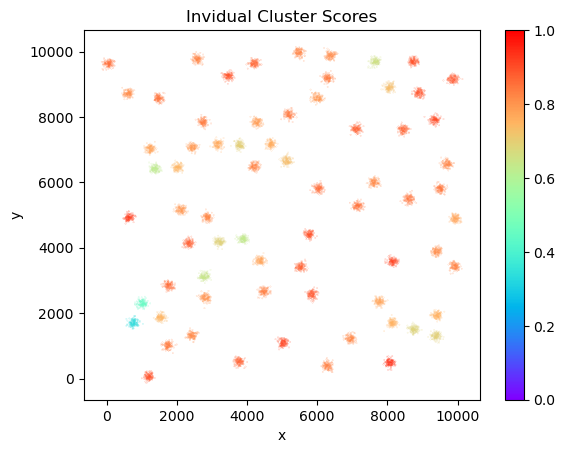

In [12]:
fig = plt.figure()
ax = fig.add_subplot()
p = ax.scatter(x, y, c=z, cmap=plt.cm.rainbow, s = 0.01, vmin = 0, vmax = 1)
ax.set_xlabel("x")
ax.set_ylabel('y')
ax.set_title('Invidual Cluster Scores')
fig.colorbar(p, ax=ax)

## Adjusting mem_cutoff

In [18]:
DBCV(X,labels, mem_cutoff = 10)

Memory cutoff reached: automatically assigned a score of -1. Increase mem_cutoff to attempt to score.


(-1, -1)